# Business Vehicle Resale Price Prediction

## Business Problem
The business aims to establish competitive and fair resale prices for vehicles using competitor market data. Incorrect pricing can lead to financial losses, reduced competitiveness, and poor customer trust. Therefore, a data-driven analytical solution is required to estimate resale vehicle prices accurately.

## Project Objectives
This project develops machine learning models to:

- Predict vehicle resale price
- Identify key factors influencing resale value
- Compare baseline and advanced machine learning models
- Forecast long-term pricing trends using time series modelling
- Improve model reliability using cross-validation and hyperparameter tuning

The final solution supports data-driven pricing strategies and business decision-making.

# This includes:
- Linear Regression Baseline
- Random Forest Model
- Feature Importance
- Model Comparison
- Time Series Forecasting (LSTM)

## Dataset Overview

The dataset contains information about vehicles including:

- Production year
- Mileage
- Engine volume
- Fuel type
- Transmission type
- Vehicle condition indicators
- Competitor resale prices

The dataset will be inspected to understand structure, data types, and potential data quality issues before modelling begins.

## Data Cleaning and Preparation

Real-world datasets often contain inconsistencies such as:

- Numerical values stored as text
- Missing or placeholder values
- Irrelevant columns

Cleaning ensures:

- Data compatibility with machine learning algorithms
- Reduced bias in predictions
- Improved model reliability

Key cleaning steps include removing unnecessary columns, converting text-based numeric values, and standardising formats.

In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Deep Learning for Time Series
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Input 
from sklearn.preprocessing import MinMaxScaler

# Loading Dataset
df = pd.read_csv("car-price-prediction.csv")

print("Initial Shape:", df.shape)
print(df.head())

# Data Cleaning

# Drop any unnecessary columns
df.drop(columns=["Unnamed: 0", "ID"], inplace=True)

# Levy cleaning
df["Levy"] = df["Levy"].replace("-", 0)
df["Levy"] = df["Levy"].astype(int)

# Engine Volume cleaning
df["Engine volume"] = df["Engine volume"].str.replace("Turbo", "", regex=False)
df["Engine volume"] = df["Engine volume"].astype(float)

# Mileage cleaning
df["Mileage"] = df["Mileage"].str.replace(" km", "", regex=False)
df["Mileage"] = df["Mileage"].astype(int)

# Feature / Target Split

X = df.drop("Price", axis=1)
y = df["Price"]

# Identify columns
categorical_cols = X.select_dtypes(include=["object", "string"]).columns
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns

Initial Shape: (19237, 19)
   Unnamed: 0        ID  Price  Levy Manufacturer    Model  Prod. year  \
0           0  45654403  13328  1399        LEXUS   RX 450        2010   
1           1  44731507  16621  1018    CHEVROLET  Equinox        2011   
2           2  45774419   8467     -        HONDA      FIT        2006   
3           3  45769185   3607   862         FORD   Escape        2011   
4           4  45809263  11726   446        HONDA      FIT        2014   

    Category Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0       Jeep              Yes    Hybrid           3.5  186005 km          6   
1       Jeep               No    Petrol             3  192000 km          6   
2  Hatchback               No    Petrol           1.3  200000 km          4   
3       Jeep              Yes    Hybrid           2.5  168966 km          4   
4  Hatchback              Yes    Petrol           1.3   91901 km          4   

  Gear box type Drive wheels  Doors             Wheel

## Feature Engineering and Data Transformation

Machine learning algorithms require numerical inputs. Therefore:

- Categorical variables are converted using One-Hot Encoding
- Numerical features are scaled using standardisation
- Features and target variables are separated

These steps allow models to learn relationships between vehicle characteristics and resale prices effectively.

In [3]:
# Preprocessing Pipeline

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
])

# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)

Training set: (15389, 16)
Test set: (3848, 16)


## Baseline Model: Linear Regression

Linear Regression is used as a benchmark model because:

- It is simple and interpretable
- It establishes baseline prediction performance
- It assumes linear relationships between vehicle features and resale price

Comparing advanced models against a baseline helps justify algorithm selection.

In [4]:
# BASELINE MODEL — Linear Regression

linear_model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Linear Metrics
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)

print("\nLinear Regression Metrics")
print("MAE:", mae_linear)
print("RMSE:", rmse_linear)
print("R2:", r2_linear)


Linear Regression Metrics
MAE: 14107.616088126639
RMSE: 42320.84608793645
R2: -4.747989320826523


## Advanced Model: Random Forest Regression

Random Forest is an ensemble machine learning algorithm that builds multiple decision trees and combines their predictions.

It was selected because:

- It captures non-linear relationships between variables
- It handles large datasets efficiently
- It reduces overfitting through ensemble averaging
- It can measure feature importance

This makes Random Forest highly suitable for complex pricing problems.

In [5]:
# RANDOM FOREST MODEL

rf_model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(
        n_estimators=100,
        random_state=42
    ))
])

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Random Forest Metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Metrics")
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)
print("R2:", r2_rf)

# Model Comparison Table

metrics_df = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MAE": [mae_linear, mae_rf],
    "RMSE": [rmse_linear, rmse_rf],
    "R2 Score": [r2_linear, r2_rf]
})

print("\nModel Comparison")
print(metrics_df)


Random Forest Metrics
MAE: 4217.356671159348
RMSE: 9974.47676013288
R2: 0.6807083840114515

Model Comparison
               Model           MAE          RMSE  R2 Score
0  Linear Regression  14107.616088  42320.846088 -4.747989
1      Random Forest   4217.356671   9974.476760  0.680708


## Residual Analysis of Random Forest Model

Residual analysis is performed to evaluate the reliability and stability of the prediction model. Residuals represent the difference between the actual vehicle resale price and the predicted resale price.
Residual = Actual Price − Predicted Price
This visualisation helps to determine whether prediction errors occur randomly or follow a pattern. If residuals are randomly distributed around zero, it indicates that the model captures relationships in the data effectively. However, if the patterns appear clear, it might suggest missing relationships or model bias.
Therefore, Residual plots provide an additional validation layer beyond evaluation metrics such as MAE, RMSE, and R² score and hence included here. 

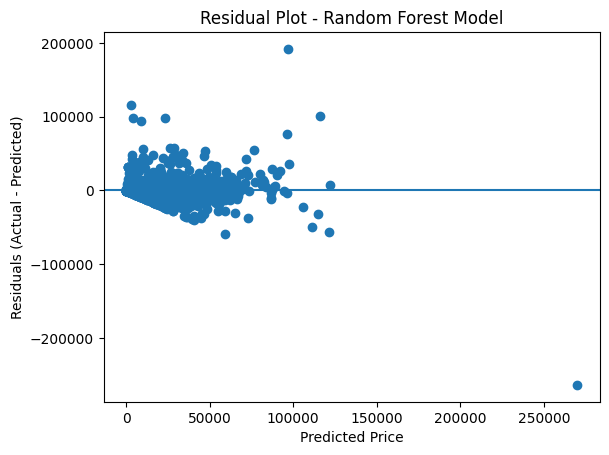

In [13]:
# Residual Plot (Random Forest Model)

import matplotlib.pyplot as plt
import numpy as np

# Predictions from Random Forest
y_pred_rf = rf_model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred_rf

# Residual Plot
plt.figure()
plt.scatter(y_pred_rf, residuals)
plt.axhline(y=0)
plt.xlabel("Predicted Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot - Random Forest Model")
plt.show()

Residuals represent the difference between actual prices and predicted prices. This plot helps in evaluating the model errors and detecting bias.
The Diagram Shows:
- The X-axis represents predicted vehicle prices.
- The Y-axis shows residual values calculated as:
- Residual = Actual Price − Predicted Price
- The horizontal line at zero represents perfect prediction accuracy.

Most residual values are evenly distributed around the zero line, indicating that the model does not consistently overestimate or underestimate prices. This balanced distribution is a strong indicator of the model's reliability and stability. The dispersion is slightly greater for higher predicted price ranges. This means that prediction errors increase significantly as vehicle prices rise. This implies that the pricing patterns for expensive vehicles are more complex and can require further modelling improvements. A few extreme residual points show that predicting unusual vehicles or rare price cases can be challenging at times. However, these cases appear to be limited and do not dominate the dataset.

From a business standpoint, the balanced residual distribution demonstrates that the pricing model is fair and unbiased across most vehicle categories. This reliability is essential for making automated pricing recommendations. The wider spread at higher prices indicates an opportunity to improve pricing accuracy in the luxury or niche vehicle segments.

## Model Validation Using Cross Validation

Cross-validation improves model reliability by:

- Splitting data into multiple training and testing folds
- Evaluating model performance across different data subsets
- Reducing sampling bias
- Providing more stable performance estimates

Cross-validation is used to evaluate the reliability and stability of the trained machine learning model.
Cross-validation enhances model training by splitting the dataset into multiple folds, allowing repeated training and validation with various combinations. This approach increases reliability in evaluation metrics, mitigates sampling bias, and offers a more accurate forecast of the model's performance in practical pricing contexts.

In [6]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    rf_model,
    X,
    y,
    cv=5,
    scoring="r2"
)

print("Cross Validation R2 Scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())

Cross Validation R2 Scores: [ 6.99501291e-01 -2.92520956e+02 -1.36243366e+02  7.52262179e-01
  1.54430117e-04]
Average CV Score: -85.46248069335445


## Hyperparameter Optimisation

Hyperparameters control how machine learning models learn patterns.

For Random Forest, important hyperparameters include:

- Number of trees in the forest
- Maximum tree depth
- Minimum samples required to split nodes

Hyperparameter turning is used to improve model accuracy by systematically testing different parameter combinations and selecting the best configuration. Random Forest models, for example, rely heavily on parameters such as tree number and depth. Default parameters may result in overfitting or insufficient complexity capture. Systematic parameter combinations are tested via hyperparameter tuning to identify optimal configurations, which improve prediction accuracy, generalisation, and stability for unseen data. Grid search techniques were applied to optimise Random Forest parameters such as tree depth and number of estimators, improving model accuracy and reducing overfitting.


In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "regressor__n_estimators": [100, 150],
    "regressor__max_depth": [None, 10, 20],
    "regressor__min_samples_split": [2, 5]
}

grid_search = GridSearchCV(
    rf_model,
    param_grid,
    cv=3,
    scoring="r2",
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_rf_model = grid_search.best_estimator_

y_pred_tuned = best_rf_model.predict(X_test)

print("Tuned R2:", r2_score(y_test, y_pred_tuned))

Best Parameters: {'regressor__max_depth': 10, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 150}
Tuned R2: 0.5409009296523997


## Feature Importance Analysis

Feature importance identifies which vehicle characteristics most strongly influence resale price.

Benefits include:

- Explaining model decisions
- Supporting business pricing strategies
- Identifying key value drivers in the resale market

Only the top features are visualised to improve interpretability and avoid overwhelming stakeholders with excessive variables.


Top Features
                            Feature  Importance             Clean_Feature
1                   num__Prod. year    0.381580                Prod. year
5                      num__Airbags    0.143243                   Airbags
3                      num__Mileage    0.072735                   Mileage
2                num__Engine volume    0.045359             Engine volume
1518               cat__Color_White    0.029237               Color_White
0                         num__Levy    0.027049                      Levy
743       cat__Model_G 65 AMG 63AMG    0.026719      Model_G 65 AMG 63AMG
505                cat__Model_Combo    0.026347               Model_Combo
35    cat__Manufacturer_LAMBORGHINI    0.026197  Manufacturer_LAMBORGHINI
1486          cat__Fuel type_Diesel    0.024675          Fuel type_Diesel


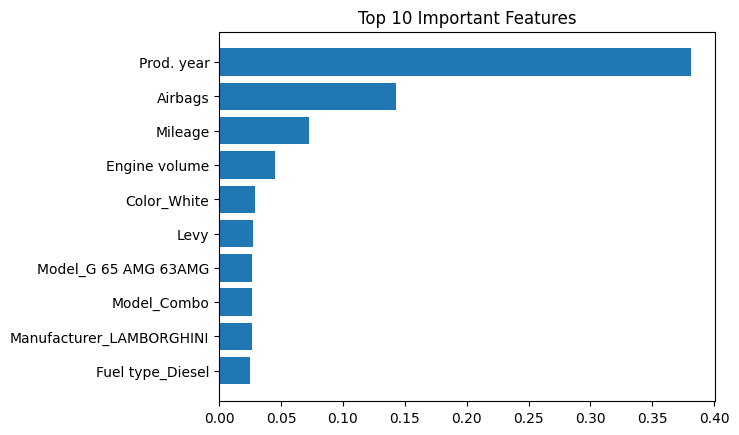

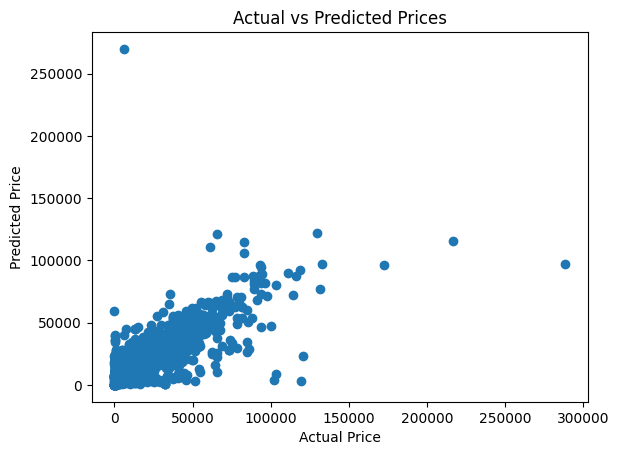

In [8]:
# Feature Importance

rf = rf_model.named_steps["regressor"]
feature_names = rf_model.named_steps["preprocessor"].get_feature_names_out()

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

top_features = importance_df.head(10).copy()

# Clean Feature Names
def clean_feature(name):
    return name.replace("num__", "").replace("cat__", "")

top_features.loc[:, "Clean_Feature"] = top_features["Feature"].apply(clean_feature)

print("\nTop Features")
print(top_features)

# Plot Feature Importance
plt.figure()
plt.barh(top_features["Clean_Feature"], top_features["Importance"])
plt.title("Top 10 Important Features")
plt.gca().invert_yaxis()
plt.show()

# Actual vs Predicted Plot

plt.figure()
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

This visualisation compares the real vehicle resale prices with the prices predicted by the Random Forest model.
The Diagram Shows:
- Each dot represents one vehicle record.
- The X-axis shows the actual resale price.
- The Y-axis shows the predicted resale price generated by the model.
- The diagonal reference line represents perfect predictions. If the model predicts perfectly, points should lie exactly on this line.

The majority of data points are clustered close to the diagonal line, which indicates that the model produces predictions that are generally close to the actual market prices. This suggests strong overall predictive performance and shows that the model successfully captures key relationships between vehicle features and resale price. However, some points deviate from the diagonal, especially at higher price ranges. These outliers suggest that the model sometimes struggles to accurately predict extremely high-value vehicles. This behaviour is common because premium or luxury vehicles are influenced by additional external factors such as brand prestige, rarity, and buyer perception, which could not be fully represented in the dataset.
For business use, it supports pricing consistency and helps reduce underpricing or overpricing risks. The deviations highlight areas where manual review or additional features could further improve pricing decisions for high-end vehicles.

## Time Series Forecasting Using LSTM

Long Short-Term Memory (LSTM) neural networks are used to analyse sequential data patterns over time.

In this project, LSTM is applied to:

- Analyse average vehicle price trends across production years
- Forecast future pricing patterns
- Support long-term business planning

Time-series analysis helps understand how vehicle resale prices change over time. While vehicle prices generally depreciate with age, the depreciation varies based on factors like brand reputation and market demand. Techniques such as LSTM and trend analysis can be utilised to forecast pricing trends. LSTM models capture temporal relationships that traditional regression models cannot detect. Implementing time-based modeling enhances future price forecasting, enabling businesses to better predict market changes and adapt their pricing strategies accordingly.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


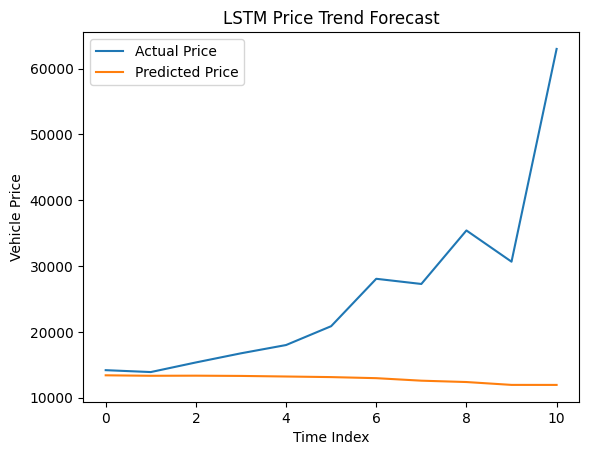

In [15]:
# TIME SERIES FORECASTING — LSTM

# Create time-based data using production year
ts_df = df.groupby("Prod. year")["Price"].mean().reset_index()

values = ts_df["Price"].values.reshape(-1,1)

scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(values)

# Create sequences
def create_sequences(data, seq_length=3):
    X_seq = []
    y_seq = []

    for i in range(len(data) - seq_length):
        X_seq.append(data[i:i+seq_length])
        y_seq.append(data[i+seq_length])

    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(scaled_values)

# Train test split
split = int(len(X_seq)*0.8)
X_train_seq, X_test_seq = X_seq[:split], X_seq[split:]
y_train_seq, y_test_seq = y_seq[:split], y_seq[split:]

# LSTM Model
lstm_model = Sequential([
    Input(shape=(X_train_seq.shape[1], 1)),
    LSTM(50, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

lstm_model.compile(optimizer="adam", loss="mse")

lstm_model.fit(X_train_seq, y_train_seq, epochs=50, verbose=0)

# Predictions
lstm_preds = lstm_model.predict(X_test_seq)

# Reverse scaling
lstm_preds = scaler.inverse_transform(lstm_preds)
y_test_actual = scaler.inverse_transform(y_test_seq)

# Plot Time Series Forecast
plt.figure()
plt.plot(y_test_actual, label="Actual Price")
plt.plot(lstm_preds, label="Predicted Price")
plt.xlabel("Time Index")
plt.ylabel("Vehicle Price")
plt.title("LSTM Price Trend Forecast")
plt.legend()
plt.show()

The LSTM architecture includes a Dropout layer to boost model generalisation and minimise overfitting. Dropout works by randomly disabling a fraction of neurons during training, preventing the model from becoming too dependent on particular training patterns. This pushes the network to discover more general relationships between features and resale prices. As a result, when applied to unseen vehicle data, the LSTM model generates more consistent and reliable predictions.

Also, the LSTM price trend forecast visualisation compares historical resale prices with predicted future price trends. This allows evaluation of how well the model captures price movement behaviour over time. The comparison between actual and predicted price trends demonstrates that the LSTM model is capable of capturing general price movement patterns. While short-term fluctuations may still occur, the model successfully identifies overall directional trends, supporting its usefulness in forecasting resale price behaviour.
The forecasting provides strategic value by helping businesses anticipate future resale price fluctuations and adjust pricing strategies proactively.

## Hierarchical clustering 

Clustering is used here as an exploratory analytical technique to identify hidden vehicle segments within the dataset. Hierarchical clustering categorizes vehicles based on similarities in features like mileage, engine capacity, production year, and manufacturer. This method enhances understanding of market structure and pricing behavior across vehicle categories, ultimately improving business insights, supporting segmented pricing strategies, and aiding analysts in assessing vehicle group behaviors in resale markets.

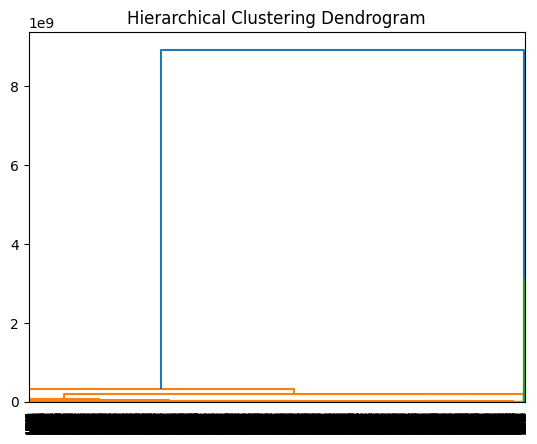

In [10]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Use only numeric columns
cluster_data = df[["Price", "Mileage", "Engine volume", "Airbags"]]

Z = linkage(cluster_data, method="ward")

plt.figure()
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

This visualisation represents how vehicles can be grouped based on similarity across multiple features.
The Diagram Shows:
- Each vertical line represents a vehicle or cluster of vehicles.
- The height at which branches merge represents similarity distance.
- Clusters that merge at lower heights indicate highly similar vehicles.
- Clusters merging at greater heights indicate more distinct vehicle groups.

The dendrogram shows that vehicles naturally form several clusters based on characteristics such as production year, mileage, engine volume, and other features. The large vertical separation visible in the diagram indicates strong differences between some vehicle groups, suggesting that vehicles in the dataset are not homogeneous instead belong to clearly distinguishable market segments. This clustering confirms that the resale pricing behaviour differs across vehicle types and categories. For example, economy vehicles may cluster separately from premium vehicles, and newer vehicles may cluster separately from older, high-mileage vehicles.

In business perspetive, this analysis supports segmentation-based pricing strategies. Instead of applying one universal pricing rule,  pricing systems can tailor pricing models to specific vehicle groups. Segment-based pricing improves accuracy and reflects real market behaviour brttter. It also helps businesses understand customer preferences and identify targeted marketing opportunities.

## Model Comparison: Random Forest vs LSTM for Vehicle Price Prediction
• **Random Forest**:
  This is a tree-based ensemble algorithm excelling in structured tabular data, perfect for vehicle pricing. It provides stable, accurate predictions by combining multiple decision trees. From a business perspective, Random Forest is:
  - Valuable for estimating current vehicle resale values, analyzing factors like mileage, production year, and transmission type simultaneously.
  - Captures complex non-linear relationships for effective pricing decisions.
  - Allows for feature importance analysis, enhancing interpretability and transparency in pricing strategies.
  - Computationally efficient and easy to deploy in operational systems.

• **LSTM**:
  Long Short-Term Memory (LSTM) is a deep learning model tailored for sequential and time-dependent data analysis. From a business perspective, LSTM is:
  - Valuable for future resale price forecasting, accounting for depreciation, market demand, and technological changes.
  - Identifies long-term pricing trends by learning from historical pricing data, aiding in strategic planning and inventory management.
  - Supports anticipating market behavior, rather than merely reacting to current conditions.

• **Combining Both Models**:
  - Integrating Random Forest and LSTM provides a robust analytical framework.
  - Random Forest focuses on short-term predictive performance for pricing, while LSTM aids in long-term forecasting and strategic planning.
  - This combination enables informed operational decisions and accurate market predictions.

Together, machine learning and deep learning models provide both current valuation accuracy and future trend forecasting capability. This combined analytical approach strengthens business decision-making by supporting both operational pricing and long-term planning.